# Methods used to calculate the usefulness of a topological index

## Distance Measures

To calculate the usefulness of a topological index we use the 4 graph measures below and calculate the euclidean distance between the two graphs. The distance is then used to calculate the usefulness of the index.

### Graph Measures

SS and Abr are defined in From 'On structure-sensitivity of degree-based topological indices'.

_See the description of $\mathscr{S}(G)$ in [10_Data](./10_data.ipynb)_

#### Structure Sensitivity (SS)

$$
SS (TI, G) = \frac{1}{|\mathscr{S}(G)|} \sum_{H\in{\mathscr{S}(G)}} {|\frac{TI(H) - TI(G)}{TI(G)}|}
$$

$TI(H)$ is the topological index of a Graph $H$ structurally similar to $G$. Summation goas over the Set $(\mathscr{S})$ of all connected graphs, structurally similar to the graph $G;|\mathscr{S}|$ is the cardinality of the set $S$.

If $SS(TI, G)$ is very small, the the index $TI$ is of little or no practical value.

#### Abruptness (Abr)

$$
Abr(TI, G) = \max_{H \in \mathscr{S}(G)} |\frac{TI(H) - TI(G)}{TI(G)}|
$$

Both $SS$ and $Abr$ are dimensionless quantities.
Abruptness will show how much a small structural change in a graph may cause a jumpwise (large) change in the considered topological index.

The best is if the structure sensitivity is as large as possible, but the abrupness is as small as possible.

#### Uniqueness

$$
S_\mathcal{G}(TI) = \frac{|\mathcal{G}| - ndv}{|\mathcal{G}|}
$$

$ndv$ is the number of graphs which cannot be distinguished by the index $TI$.

In case $TI$ is fully unique, we obtain $S_\mathcal{G}(TI) = 1$, hence ndv = $0$. The more degenerate the index $TI$ is, the smaller is $S(TI)$.

#### Structural Graph Measure

Let $\mathcal{G}$ be a class of graphs and $G \in \mathcal(G)$. Let $D(G) = (d_y)_y$ be the distance matrix of $G; d_y$ is the shortest distance from the vertex $i$ and $j$. We define structural graph measure $I_\lambda(G)$ by

$$
I_\lambda(G) = S_{\mathcal{G}}(I) * \sum_{i=1}^{k} {|{\lambda}^G_i|}
$$

${\lambda}^G_1, {\lambda}^G_2, ..., {\lambda}^G_k, k \leqslant |V|$ is the $i$-th are the non-zero eigenvalue of $D(G)$.


In [2]:
import networkx as nx

In [3]:

def abruptness(G, S):
    """Abruptness of a graph G given a set of nodes S"""
    return len(S) - structure_sensitivity(G, S)


def structure_sensitivity(G, S):
    """Structure sensitivity of a graph G given a set of nodes S"""
    G.remove_nodes_from(S)
    return nx.number_connected_components(G)


def uniqueness(G, S):
    """Uniqueness of a graph G given a set of nodes S"""
    return len(S) - len(set(S))


def structural_graph_measure(G, S, measure):
    """Structural graph measure of a graph G given a set of nodes S"""
    if measure == 'structure_sensitivity':
        return structure_sensitivity(G, S)
    elif measure == 'abruptness':
        return abruptness(G, S)
    elif measure == 'uniqueness':
        return uniqueness(G, S)
    else:
        raise ValueError('Unknown measure')


In [4]:

def usefulness_vector(G, S, measures):
    """Vector of structural graph measures of a graph G given a set of nodes S"""
    return [structural_graph_measure(G, S, measure) for measure in measures]


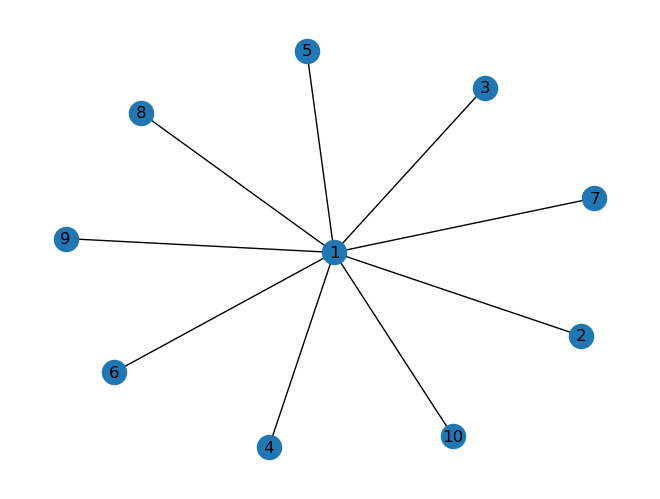

In [5]:
import networkx as nx

S = []
G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
G.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10)])

nx.draw(G, with_labels=True)



## Clustering Task